Objetivo do trabalho: Buscar padrões que sejam capazes de caracterizar a criação animal no biotério do ICC;

3) Questão: Como se comporta os dados do número de nascidos em uma série temporal por linhagens?

Após a análise de série temporal de todos os animais produzidos no biotério, a próxima hipóte que surgiu: 
Hipótese: existe uma variação anual (decomposição em série) entre o nascimento dos animais produzidos no Biotério de acordo com cada linhagem?. 

In [1]:
#Importando as bibliotecas para analise desses dados. 

import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
#Abrindo uma variável que vai receber e ler com a função .read_csv nossa tabela que será analisada

eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
#Filtrando linhagens a não serem utilizadas
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

A Dataframe é uma forma de organizar os dados como uma tabela, contendo as informações das colunas e cada instância (dado).
Na próxima célula foi criada uma Dataframe (serie_temp_ling) que foi criada para organizar o que for analizado. Para criar essa DataFrame, foi feita a partir de outra (tirar_ling) mantendo as mesmas informações de cada coluna. Tenho como index a coluna 'date_hoje'. As colunas podem estar dispostas em qualquer ordem. Você pode acrescentar apenas o que vai usar.

In [5]:
serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['ling'] = tirar_ling['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


Na próxima célula foi realizada a substituição de valores de linhagens que já foram e hoje não são mais usadas no sistema BioterC, juntando as informações para posterior análise.

In [6]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

serie_temp_ling['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

serie_temp_ling['ling'].replace(' S129KO', 'S129KO', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

serie_temp_ling['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#serie_temp_ling[(serie_temp_ling['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

serie_temp_ling['ling'].replace('Swiss A', 'Swiss-1 A', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

serie_temp_ling['ling'].replace('Swiss B', 'Swiss-1 B', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

serie_temp_ling['ling'].replace('Swiss C', 'Swiss-1 C', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

serie_temp_ling['ling'].replace('Swiss D', 'Swiss-1 D', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

serie_temp_ling['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 E')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2014-10-21 12:43:17 to 2019-06-13 14:42:22
Data columns (total 2 columns):
ling        149 non-null object
num_nasc    149 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2014-10-21 13:02:34 to 2019-05-29 18:04:17
Data columns (total 2 columns):
ling        250 non-null object
num_nasc    250 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2014-12-09 11:54:38 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        37 non-null object
num_nasc    37 non-null int64
dtypes: int64(1), object(1)
memory usage: 888.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2014-09-23 18:13:24 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        32 non-null object
num_nasc    32 non-null int64
dtypes: int64(1), object(1)
memory 

Na próxima célular serve para plotar os gráficos de decomposição em série, mas dessa vez analisando o numero de animais uma linhagem por vez, sendo as linhagens filtradas.

In [7]:
serie_temp_ling[serie_temp_ling['ling']=='C3H']['num_nasc'].sum()

603

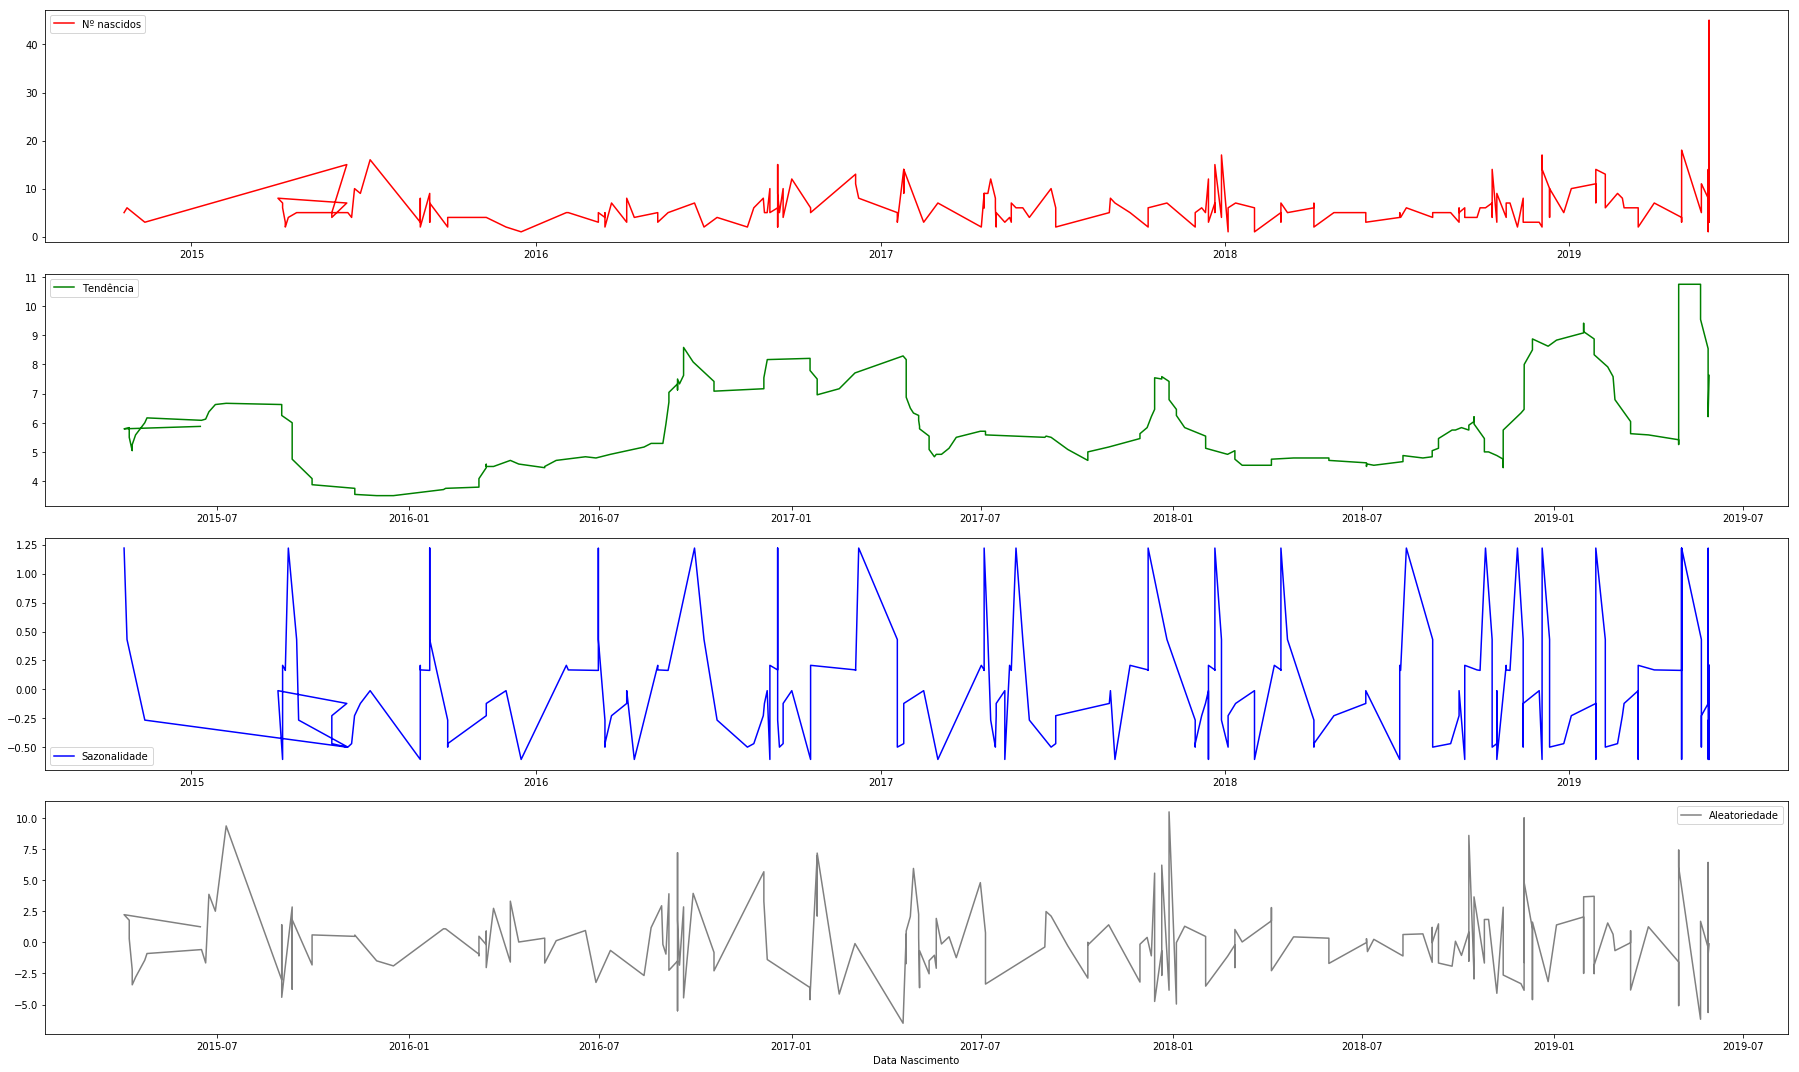

In [8]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'S129KO']['num_nasc'] #'Swiss/CFW A'
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_ling.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

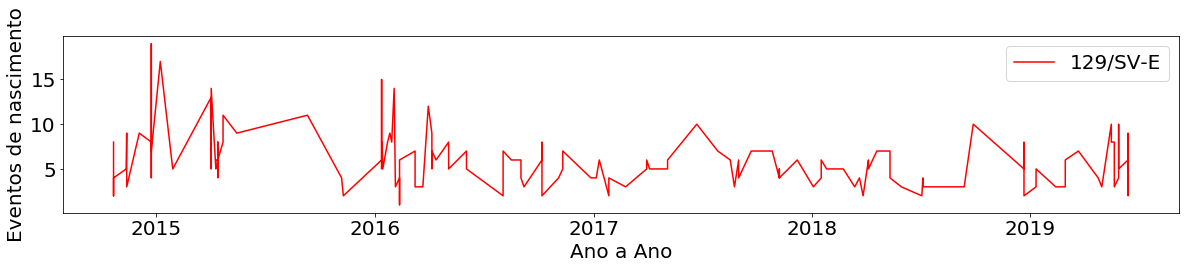

In [9]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem '129/SV-E'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == '129/SV-E']['num_nasc'] #'Swiss/CFW A'
#decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = '129/SV-E', color='red')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_129-SE-V.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

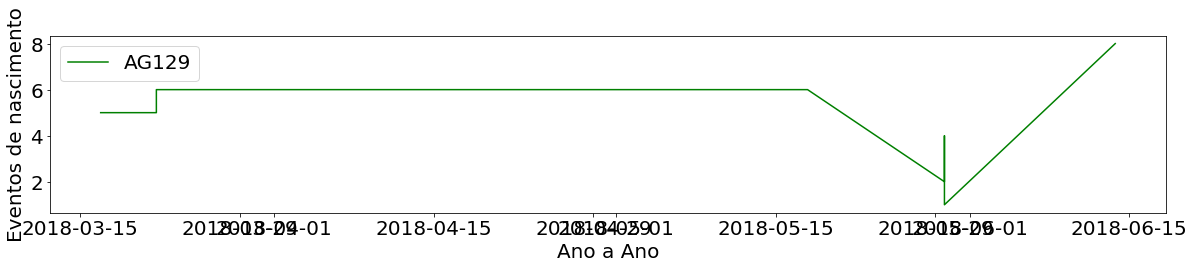

In [10]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'AG129'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'AG129']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

# plt.rcParams.update({'font.size': 10})
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'AG129', color = 'green')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_AG129.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

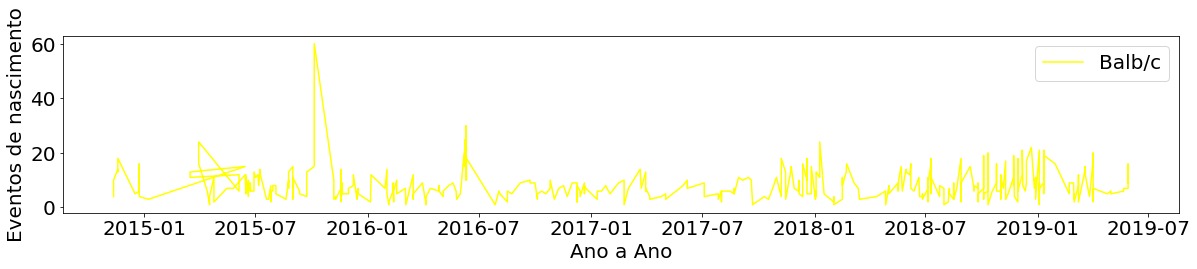

In [11]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Balb/c'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')


plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Balb/c', color = 'yellow')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Balb-c.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

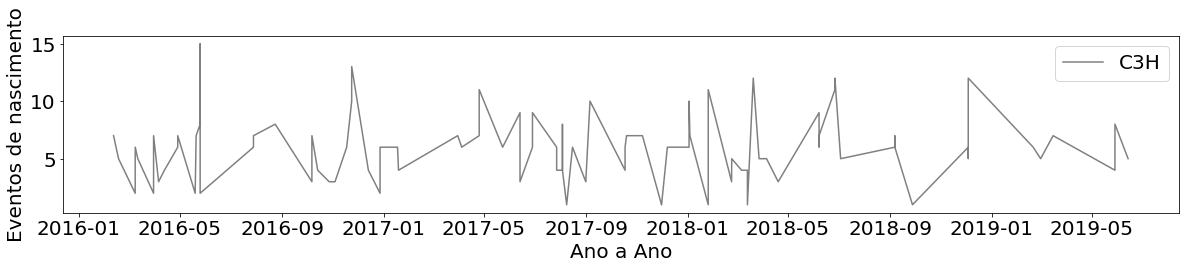

In [12]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'C3H'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'C3H']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'C3H', color = 'gray')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_C3H.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

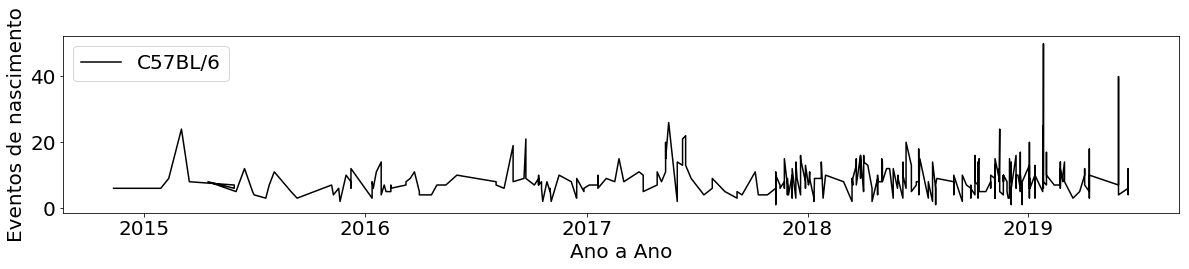

In [13]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'C57BL/6'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'C57BL/6', color = 'black')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_C57BL6.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

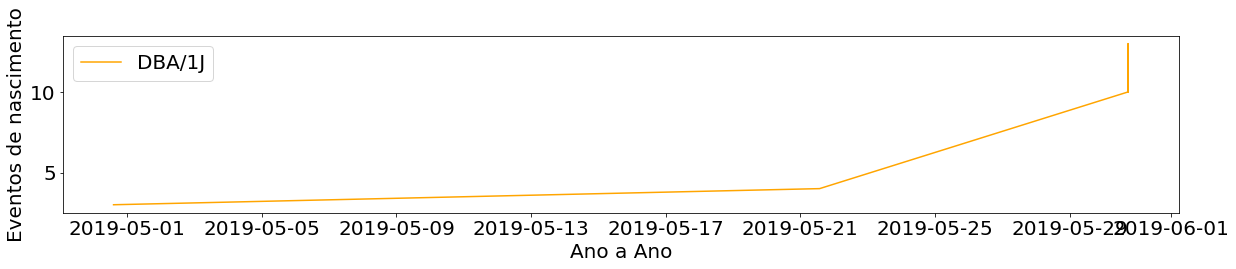

In [14]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'DBA/1J'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'DBA/1J']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'DBA/1J', color = 'orange')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_DBA-1J.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

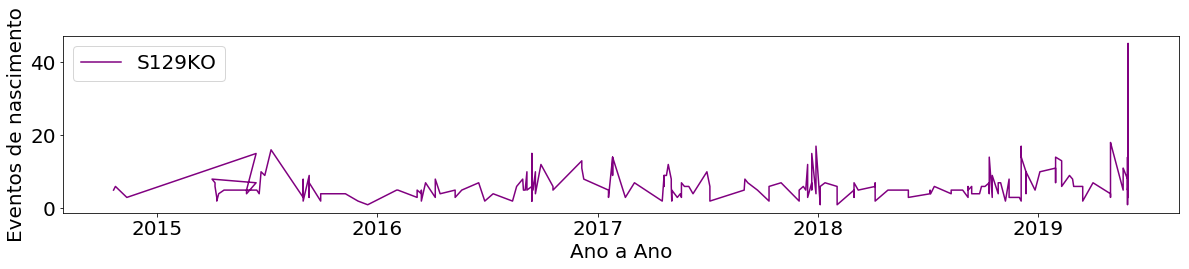

In [15]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'S129KO'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'S129KO']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'S129KO', color = 'purple')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_S129KO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

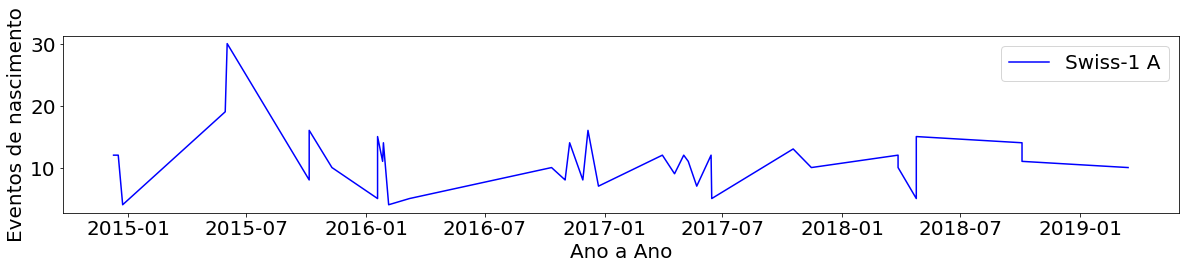

In [16]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-1 A'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-1 A']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-1 A', color = 'blue')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-1 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

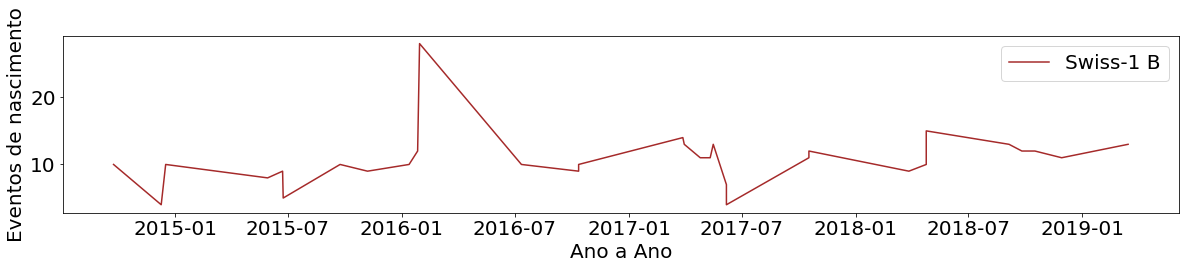

In [17]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-1 B'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-1 B']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-1 B', color = 'brown')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-1 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

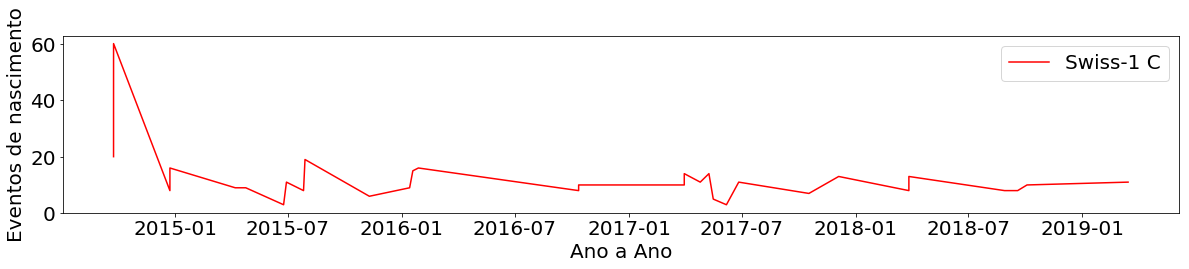

In [18]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-1 C'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-1 C']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-1 C', color = 'red')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-1 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

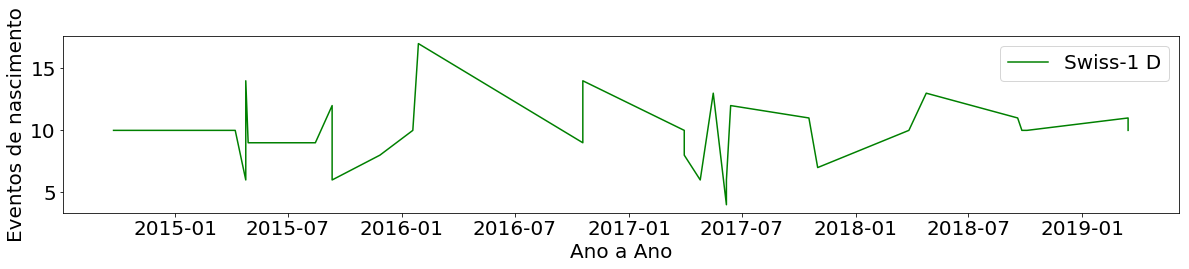

In [19]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-1 D'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-1 D']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-1 D', color = 'green')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-1 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

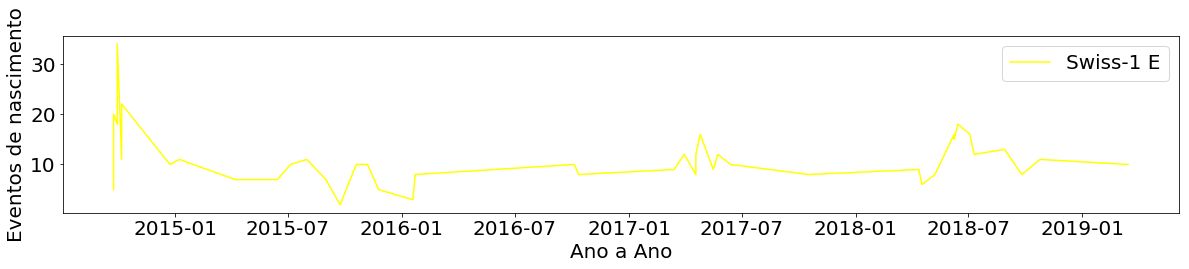

In [20]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-1 E'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-1 E']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-1 E', color = 'yellow')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-1 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

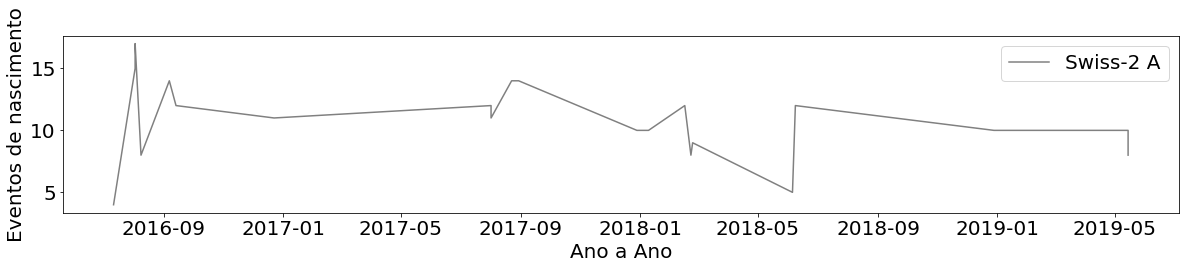

In [21]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-2 A'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-2 A']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-2 A', color = 'gray')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-2 A.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

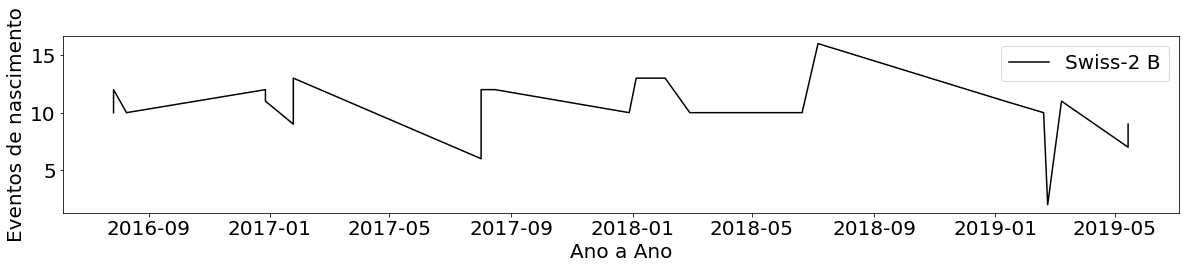

In [22]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-2 B'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-2 B']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-2 B', color = 'black')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-2 B.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

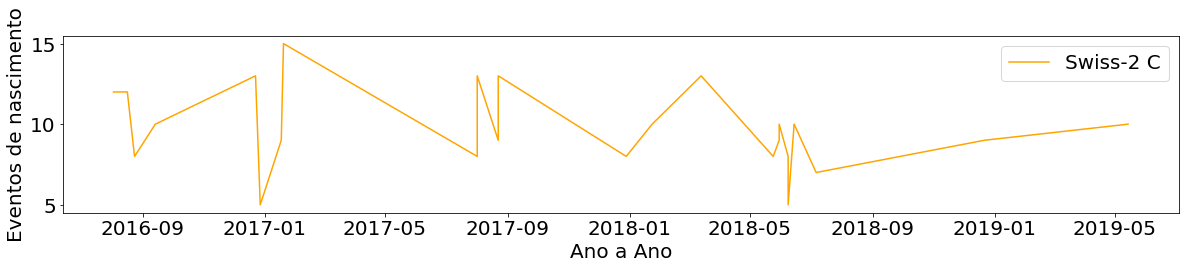

In [23]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-2 C'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-2 C']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-2 C', color = 'orange')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-2 C.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

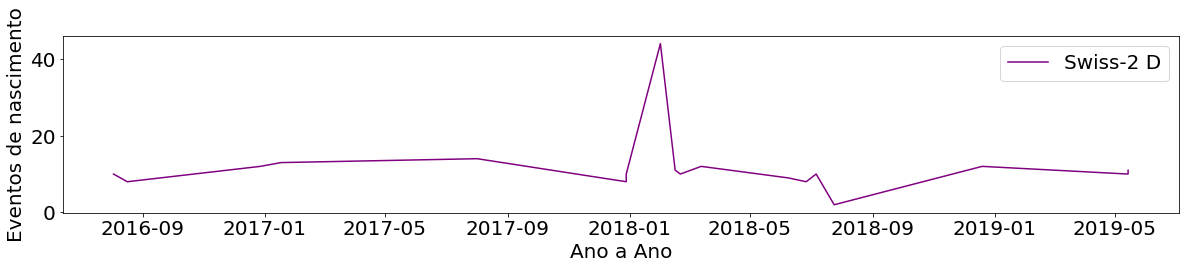

In [24]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-2 D'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-2 D']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-2 D', color = 'purple')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-2 D.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

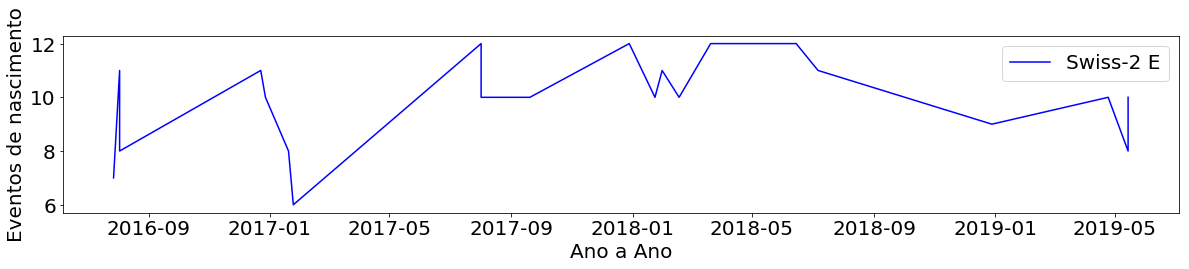

In [25]:
#Filtrando as linhagens da coluna ['ling'] e plotando a linhagem 'Swiss-2 E'

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Swiss-2 E']['num_nasc']

plt.figure(figsize=(20, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais')

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Swiss-2 E', color = 'blue')
plt.legend(loc = 'best')
plt.xlabel('Ano a Ano')
plt.ylabel('Eventos de nascimento')
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_Swiss-2 E.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

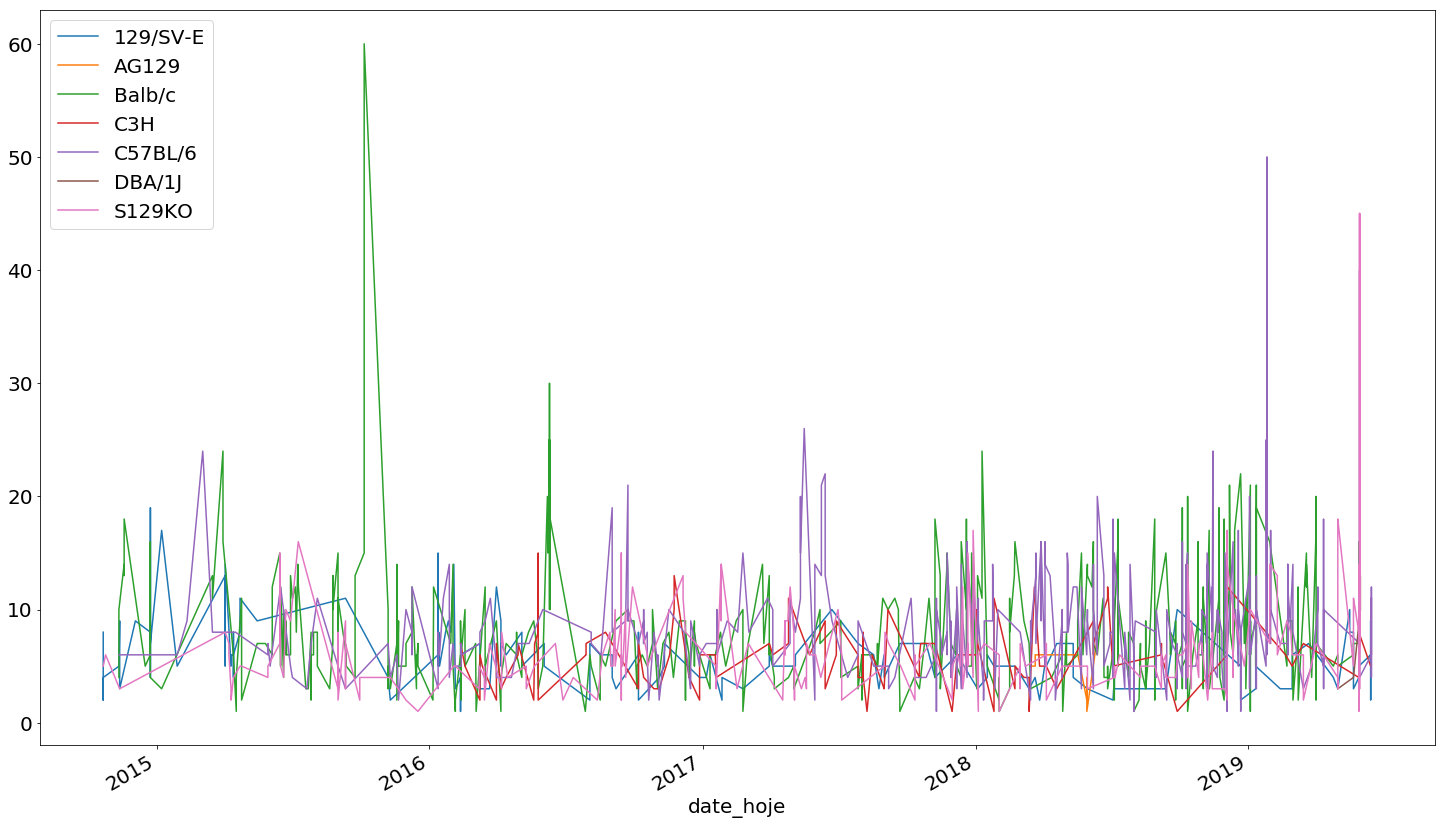

In [26]:
test_iso = ['129/SV-E', 
        'AG129', 
        'Balb/c', 
        'C3H', 
        'C57BL/6',
        'DBA/1J', 
        'S129KO'] 
        
test_het= ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']

plt.figure(figsize=(25, 15))
for t in test_iso:
    serie_temp_ling[serie_temp_ling['ling'] == t]['num_nasc'].plot()

plt.legend(test_iso)
# plt.rcParams.update({'font.size': 20})
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_todos_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)




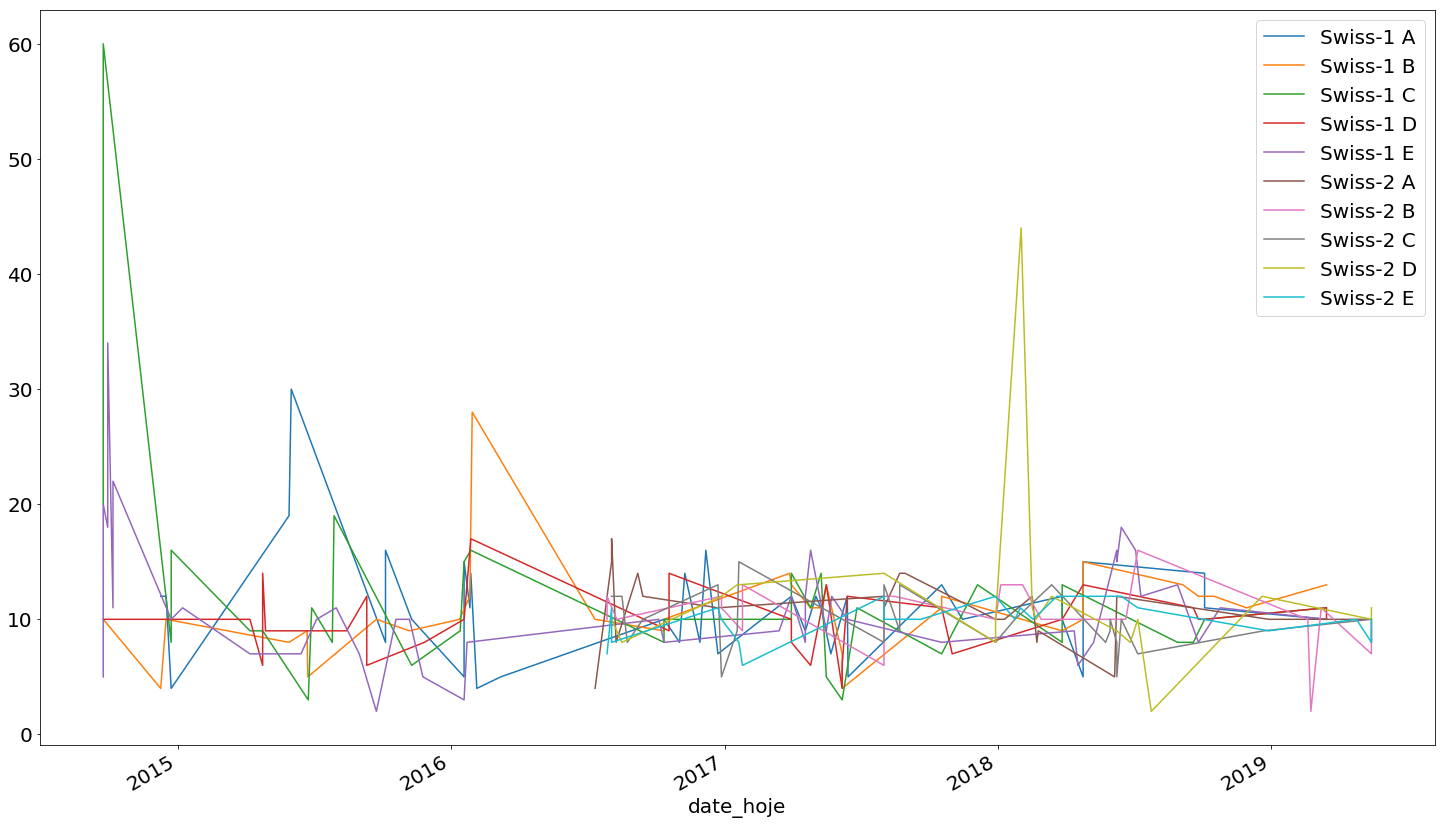

In [27]:
plt.figure(figsize=(25, 15))
for t in test_het:
    serie_temp_ling[serie_temp_ling['ling'] == t]['num_nasc'].plot()

plt.legend(test_het)
  
plt.savefig(
    fname="../resultados/3_pergunta_serietemp_todos_.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)





Resultados:
Após determinar a decomposição em série de todos os animais produzidos no biotério, foi analisada cada linhagem por vez, para avaliar como cada gráfico se comporta e a frequência da produção de cada linhagem dentro do período desde o ínicio de sua produção até Junho de 2019.


Desdobramento: Realizada a análise da Decomposição em Série por linhagens, será retirado os valores discrepantes para uma nova avaliação e se irá ter uma tendência mais clara e sazonalidade padrozinada da produção de cada linhagem.

In [28]:
serie_temp_ling['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 E     47
Swiss-1 A     37
Swiss-1 C     32
Swiss-1 B     32
Swiss-1 D     31
Swiss-2 C     27
DBA/1J        24
Swiss-2 B     24
Swiss-2 D     21
Swiss-2 A     21
Swiss-2 E     21
AG129          9
Name: ling, dtype: int64

In [29]:
g = serie_temp_ling.groupby('ling')
g.describe()

num_nasc                                                   
             count       mean        std  min   25%   50%   75%   max
ling                                                                 
129/SV-E     149.0   6.073826   3.042701  1.0   4.0   6.0   8.0  19.0
AG129          9.0   4.777778   2.166667  1.0   4.0   5.0   6.0   8.0
Balb/c       498.0   8.612450   5.852342  1.0   5.0   7.0  11.0  60.0
C3H          102.0   5.911765   2.821779  1.0   4.0   6.0   7.0  15.0
C57BL/6      460.0   8.697826   5.178091  1.0   6.0   8.0  10.0  50.0
DBA/1J        24.0   9.583333   1.976309  3.0  10.0  10.0  10.0  13.0
S129KO       250.0   6.448000   4.234978  1.0   4.0   6.0   8.0  45.0
Swiss-1 A     37.0  10.918919   4.895454  4.0   8.0  11.0  13.0  30.0
Swiss-1 B     32.0  10.750000   4.087747  4.0   9.0  10.0  12.0  28.0
Swiss-1 C     32.0  12.906250  10.831136  3.0   8.0  10.0  14.0  60.0
Swiss-1 D     31.0  10.032258   2.983107  4.0   8.5  10.0  11.5  17.0
Swiss-1 E     47.0  11.297872   5.755583  2.0   8.0  10.0  12.0  34.0
Swiss-2 A     21.0  10.761905   3.176551  4.0   9.0  11.0  12.0  17.0
Swiss-2 B     24.0  10.500000   2.766256  2.0  10.0  10.5  12.0  16.0
Swiss-2 C     27.0   9.851852   2.444833  5.0   8.0  10.0  12.0  15.0
Swiss-2 D     21.0  11.857143   7.786435  2.0  10.0  10.0  12.0  44.0
Swiss-2 E     21.0   9.904762   1.700140  6.0   9.0  10.0  11.0  12.0

In [30]:
import seaborn as sns

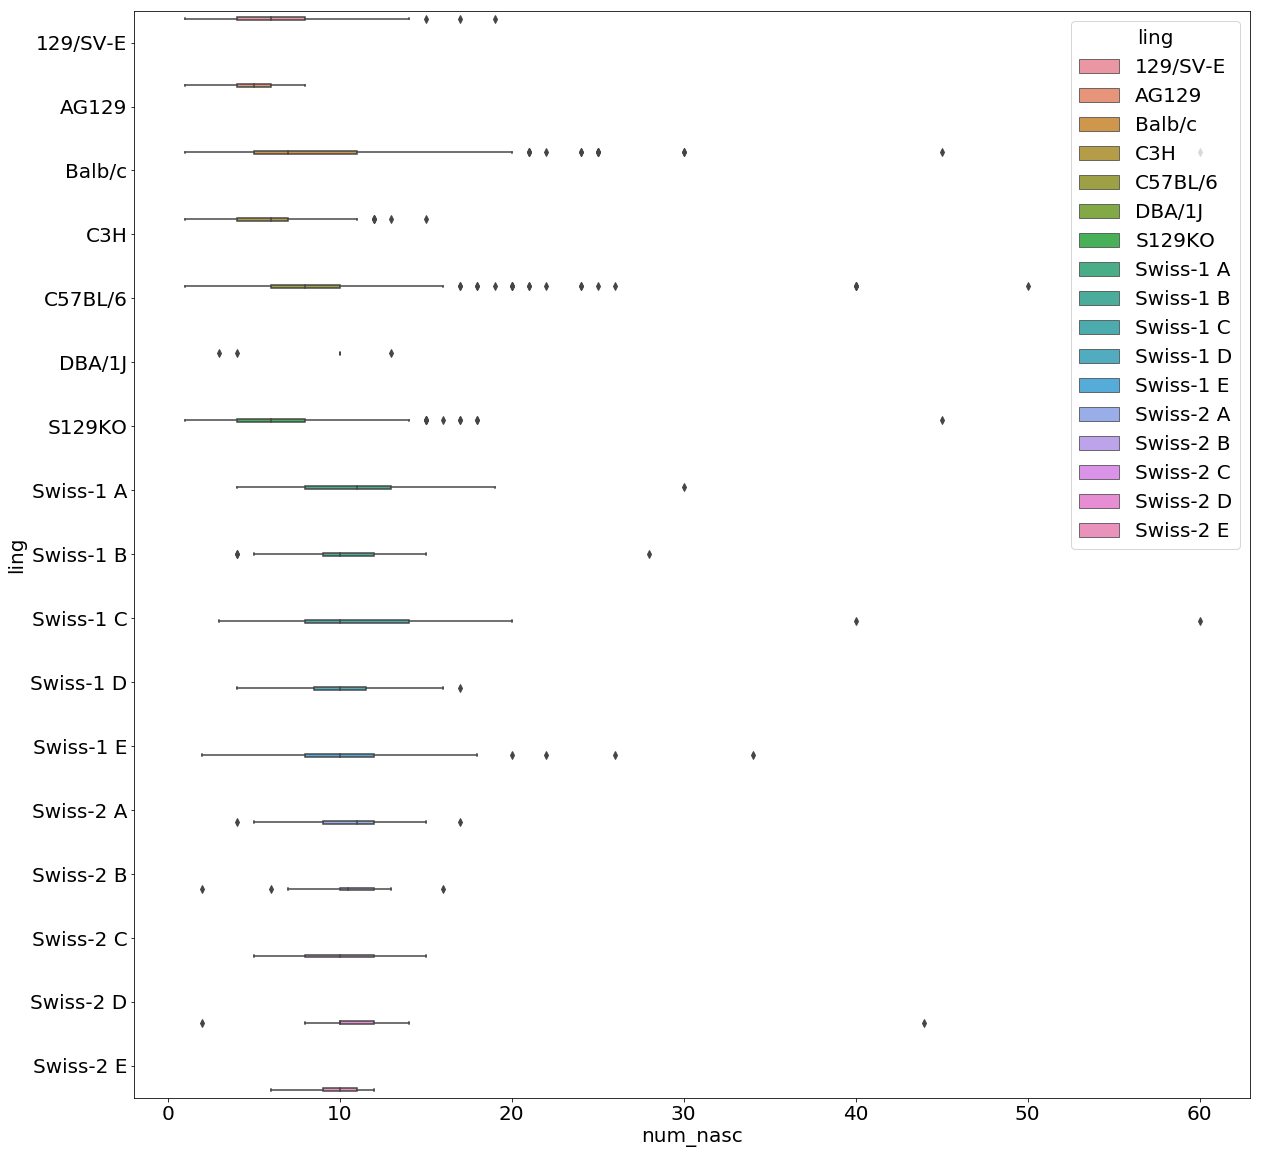

In [31]:
plt.figure(figsize=(20,20))
sns.boxplot(
    y='ling',
    x='num_nasc',
    hue='ling',
    data=serie_temp_ling.sort_values('ling')
)

In [32]:
from numpy import quantile

In [33]:
from numpy import quantile

q1 = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'].quantile(0.25)
q2 = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'].quantile(0.5)
q3 = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'].quantile(0.75)

print(f'{q1} - {q2} - {q3}')

5.0 - 7.0 - 11.0


In [34]:
iqr = q3 -q1
iqr

6.0

In [35]:
ds = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'] > (q1 - 1.5 * iqr)
serie_temp_ling[ds.index]
# sns.boxplot(
#     y='ling',
#     x='num_nasc',
#     hue='ling',
#     data=serie_temp_ling_Bal
# )

KeyError: "DatetimeIndex(['2014-11-11 11:50:50', '2014-11-11 11:50:50',\n               '2014-11-11 11:51:07', '2014-11-11 11:51:07',\n               '2014-11-18 12:17:18', '2014-11-18 12:18:56',\n               '2014-11-18 12:19:13', '2014-12-16 16:42:52',\n               '2014-12-23 12:02:35', '2014-12-23 12:03:54',\n               ...\n               '2019-04-30 13:39:11', '2019-04-30 13:42:55',\n               '2019-05-21 13:14:03', '2019-05-21 13:14:37',\n               '2019-05-28 18:43:10', '2019-05-28 18:43:10',\n               '2019-05-28 18:43:11', '2019-05-28 18:43:11',\n               '2019-05-28 18:43:11', '2019-05-28 18:59:42'],\n              dtype='datetime64[ns]', name='date_hoje', length=498, freq=None) not in index"